In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
samples = ["CX113C","CX113E","CX113F","CX113H","CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4"]

In [3]:
samples = ["CX1138","Neige_2_3"]

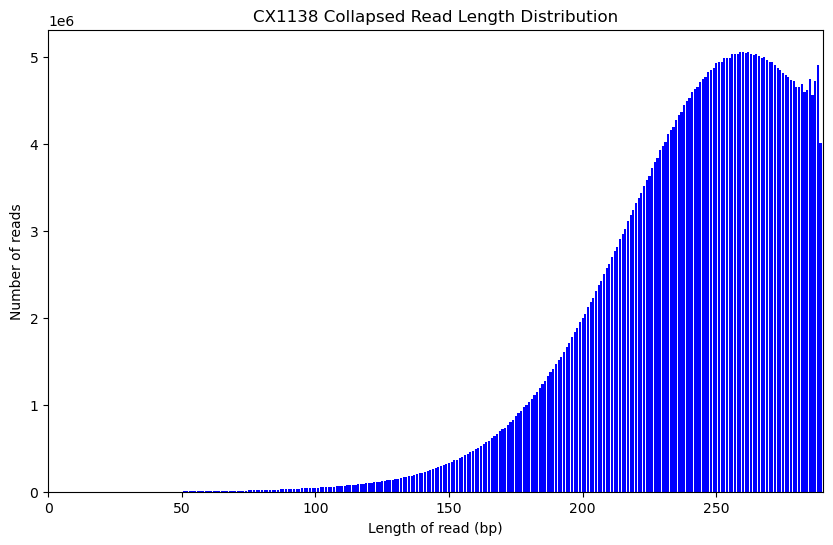

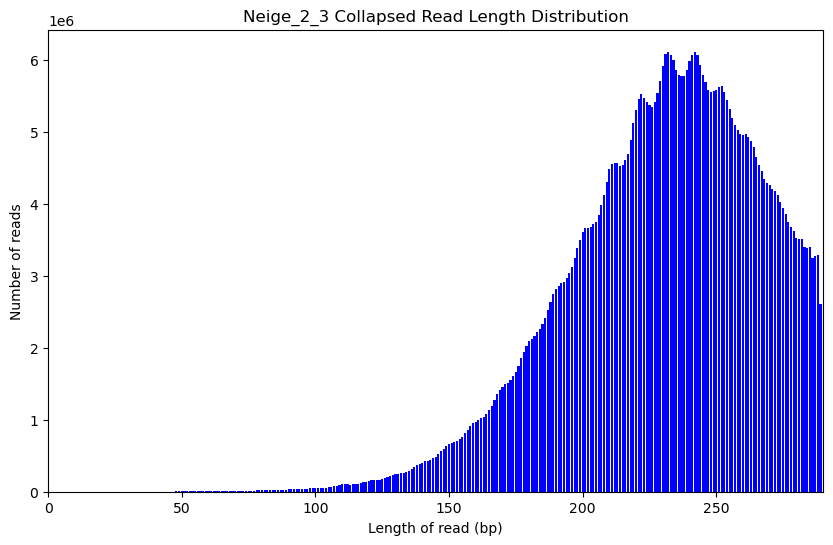

In [28]:
for sample in samples:
    df = pd.read_csv(f"./length_data/{sample}_se.tsv", sep="\t", header=37)
    plt.figure(figsize=(10, 6))
    plt.bar(x=df["Length"], height=df["Mate1"], width=0.8, color="blue", label="Retained")
    plt.bar(x=df["Length"], height=df["Discarded"], width=0.8, color="red", label="Discarded")
    plt.xlabel("Length of read (bp)")
    plt.xlim(0, 290)
    plt.ylabel("Number of reads")
    plt.title(f"{sample} Collapsed Read Length Distribution")
    plt.savefig(f"./figs/{sample}_lengths.png", dpi=300, bbox_inches="tight")
    plt.show()

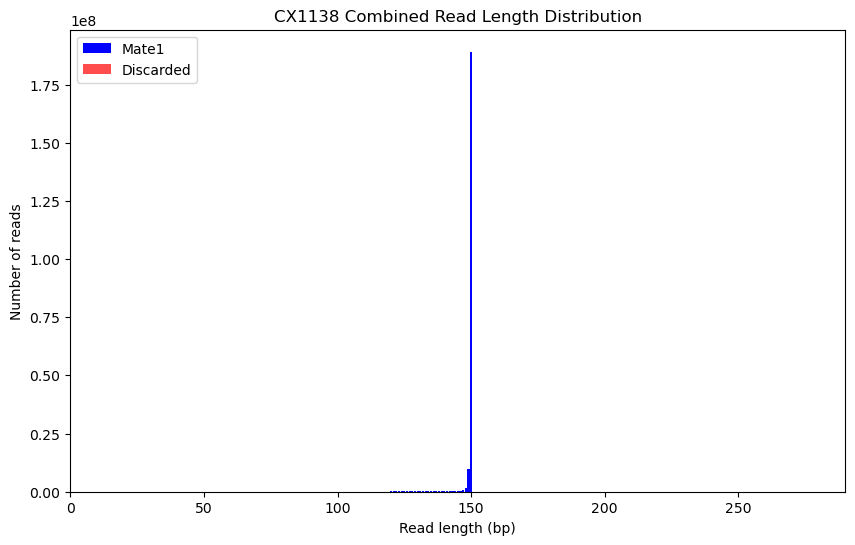

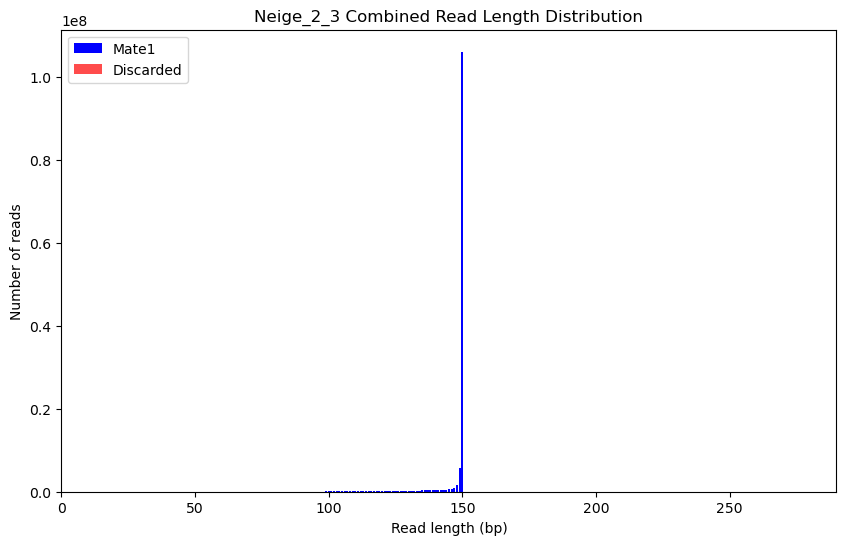

In [33]:
for sample in samples:
    # Read PE file
    with open(f"./length_data/{sample}_pe.tsv") as f:
        lines_pe = f.readlines()
    start_pe = next(i for i, line in enumerate(lines_pe) if '[Length distribution]' in line) + 1
    df_pe = pd.read_csv(f"./length_data/{sample}_pe.tsv", sep="\t", header=0, skiprows=start_pe, engine='python')

    # Read SE file
    with open(f"./length_data/{sample}_se.tsv") as f:
        lines_se = f.readlines()
    start_se = next(i for i, line in enumerate(lines_se) if '[Length distribution]' in line) + 1
    df_se = pd.read_csv(f"./length_data/{sample}_se.tsv", sep="\t", header=0, skiprows=start_se, engine='python')

    # Ensure numeric
    for c in ["Length", "Mate1", "Discarded", "All"]:
        df_pe[c] = pd.to_numeric(df_pe[c], errors='coerce').fillna(0).astype(int)
        df_se[c] = pd.to_numeric(df_se[c], errors='coerce').fillna(0).astype(int)

    # Merge by Length
    df_combined = pd.merge(df_pe, df_se, on="Length", how="outer", suffixes=("_pe","_se"))

    # Sum counts
    df_combined["Mate1"] = df_combined["Mate1_pe"] + df_combined["Mate1_se"]
    df_combined["Discarded"] = df_combined["Discarded_pe"] + df_combined["Discarded_se"]
    df_combined["All"] = df_combined["All_pe"] + df_combined["All_se"]

    # Keep only needed columns
    df_combined = df_combined[["Length","Mate1","Discarded","All"]]

    # Plot
    plt.figure(figsize=(10,6))
    plt.bar(df_combined["Length"], df_combined["Mate1"], color="blue", label="Mate1")
    plt.bar(df_combined["Length"], df_combined["Discarded"], color="red", label="Discarded", alpha=0.7)
    plt.xlabel("Read length (bp)")
    plt.ylabel("Number of reads")
    plt.xlim(0, 290)
    plt.title(f"{sample} Combined Read Length Distribution")
    plt.legend()
    plt.savefig(f"./figs/{sample}_combined_lengths.png", dpi=300, bbox_inches="tight")
    plt.show()


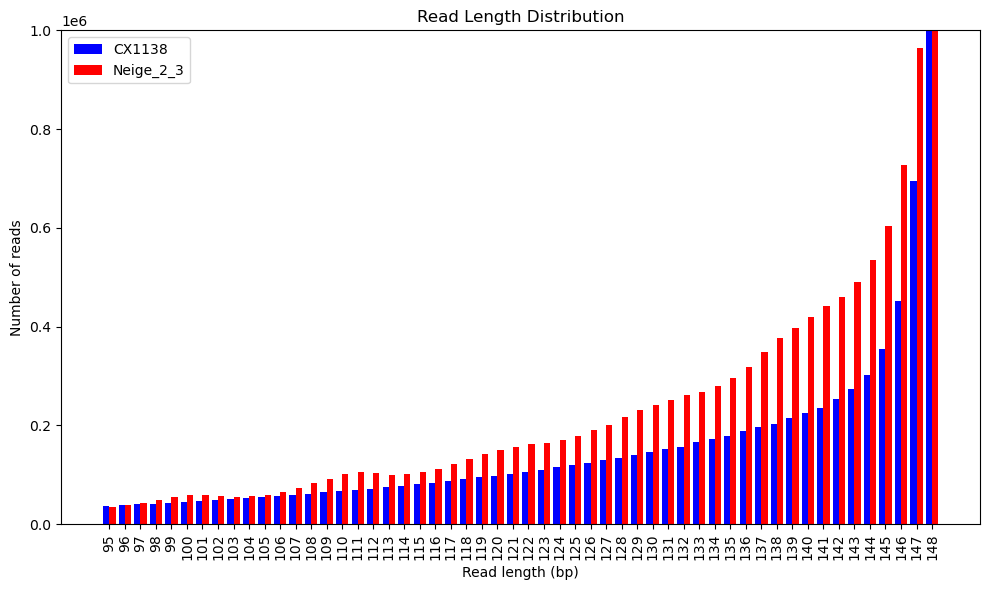

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

samples = ["CX1138","Neige_2_3"]

dfs = []

for sample in samples:
    # Read PE file
    with open(f"./length_data/{sample}_pe.tsv") as f:
        lines_pe = f.readlines()
    start_pe = next(i for i, line in enumerate(lines_pe) if '[Length distribution]' in line) + 1
    df_pe = pd.read_csv(f"./length_data/{sample}_pe.tsv", sep="\t", header=0, skiprows=start_pe, engine='python')

    # Read SE file
    with open(f"./length_data/{sample}_se.tsv") as f:
        lines_se = f.readlines()
    start_se = next(i for i, line in enumerate(lines_se) if '[Length distribution]' in line) + 1
    df_se = pd.read_csv(f"./length_data/{sample}_se.tsv", sep="\t", header=0, skiprows=start_se, engine='python')

    # Ensure numeric
    for c in ["Length", "Mate1", "Discarded", "All"]:
        df_pe[c] = pd.to_numeric(df_pe[c], errors='coerce').fillna(0).astype(int)
        df_se[c] = pd.to_numeric(df_se[c], errors='coerce').fillna(0).astype(int)

    # Merge and sum counts
    df_combined = pd.merge(df_pe, df_se, on="Length", how="outer", suffixes=("_pe","_se"))
    df_combined["Mate1"] = df_combined["Mate1_pe"] + df_combined["Mate1_se"]
    df_combined["Discarded"] = df_combined["Discarded_pe"] + df_combined["Discarded_se"]
    df_combined["All"] = df_combined["All_pe"] + df_combined["All_se"]
    df_combined = df_combined[["Length","Mate1","Discarded","All"]]

    # Restrict to 50-150 bp
    df_combined = df_combined[(df_combined["Length"] >= 95) & (df_combined["Length"] <= 148)]

    dfs.append(df_combined)

# Plot side by side
x = np.arange(len(dfs[0]))  # positions
width = 0.4

plt.figure(figsize=(10,6))
plt.bar(x - width/2, dfs[0]["Mate1"], width=width, color="blue", label=samples[0])
plt.bar(x + width/2, dfs[1]["Mate1"], width=width, color="red", label=samples[1])
plt.xlabel("Read length (bp)")
plt.ylabel("Number of reads")
plt.xticks(x, dfs[0]["Length"],rotation=90)
plt.ylim(0, 1e6)
plt.title("Read Length Distribution")
plt.legend()
plt.tight_layout()
plt.show()


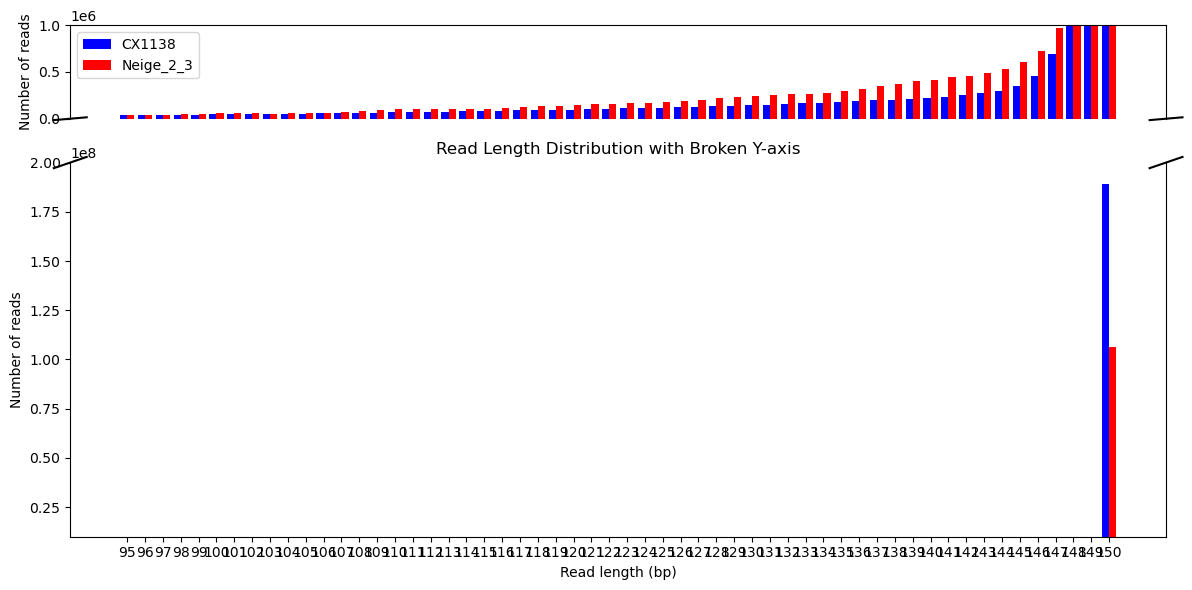

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

samples = ["CX1138","Neige_2_3"]

dfs = []

for sample in samples:
    # Read PE file
    with open(f"./length_data/{sample}_pe.tsv") as f:
        lines_pe = f.readlines()
    start_pe = next(i for i, line in enumerate(lines_pe) if '[Length distribution]' in line) + 1
    df_pe = pd.read_csv(f"./length_data/{sample}_pe.tsv", sep="\t", header=0, skiprows=start_pe, engine='python')

    # Read SE file
    with open(f"./length_data/{sample}_se.tsv") as f:
        lines_se = f.readlines()
    start_se = next(i for i, line in enumerate(lines_se) if '[Length distribution]' in line) + 1
    df_se = pd.read_csv(f"./length_data/{sample}_se.tsv", sep="\t", header=0, skiprows=start_se, engine='python')

    # Ensure numeric
    for c in ["Length", "Mate1", "Discarded", "All"]:
        df_pe[c] = pd.to_numeric(df_pe[c], errors='coerce').fillna(0).astype(int)
        df_se[c] = pd.to_numeric(df_se[c], errors='coerce').fillna(0).astype(int)

    # Merge and sum counts
    df_combined = pd.merge(df_pe, df_se, on="Length", how="outer", suffixes=("_pe","_se"))
    df_combined["Mate1"] = df_combined["Mate1_pe"] + df_combined["Mate1_se"]
    df_combined["Discarded"] = df_combined["Discarded_pe"] + df_combined["Discarded_se"]
    df_combined["All"] = df_combined["All_pe"] + df_combined["All_se"]
    df_combined = df_combined[["Length","Mate1","Discarded","All"]]

    # Restrict to 95-150 bp
    df_combined = df_combined[(df_combined["Length"] >= 95) & (df_combined["Length"] <= 150)]

    dfs.append(df_combined)

# Prepare x positions
x = np.arange(len(dfs[0]))
width = 0.4

# Create two subplots (for broken y-axis)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6), gridspec_kw={'height_ratios':[1,4]})

# Plot lower y-range
ax1.bar(x - width/2, dfs[0]["Mate1"], width=width, color="blue", label=samples[0])
ax1.bar(x + width/2, dfs[1]["Mate1"], width=width, color="red", label=samples[1])
ax1.set_ylim(0, 1e6)  # lower range
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)

# Plot upper y-range
ax2.bar(x - width/2, dfs[0]["Mate1"], width=width, color="blue")
ax2.bar(x + width/2, dfs[1]["Mate1"], width=width, color="red")
ax2.set_ylim(1e7, 2e8)  # upper range
ax2.spines['top'].set_visible(False)

# Break marks
d = .015  # size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left
ax1.plot((1-d,1+d), (-d,+d), **kwargs)        # top-right

kwargs.update(transform=ax2.transAxes)  # switch to bottom axes
ax2.plot((-d,+d),(1-d,1+d), **kwargs)  # bottom-left
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs)  # bottom-right

# Labels and title
ax2.set_xlabel("Read length (bp)")
ax1.set_ylabel("Number of reads")
ax2.set_ylabel("Number of reads")
plt.xticks(x, dfs[0]["Length"])
plt.title("Read Length Distribution with Broken Y-axis")
ax1.legend()

plt.tight_layout()
plt.show()
